<a href="https://colab.research.google.com/github/AkshataKishore/Boston_Housing_Predictive_Analysis/blob/main/Attribution_Priors_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install path-explain
! pip install shap 

In [ ]:
! pip install plot 

In [28]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from path_explain import PathExplainerTF, scatter_plot, summary_plot, softplus_activation
from path_explain.utils import set_up_environment


In [4]:

set_up_environment(visible_devices='3')

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()


In [39]:
scaler = StandardScaler()

In [40]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(13,)))
model.add(tf.keras.layers.Dense(units=32, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(units=32, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(units=1,  activation=None))

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
loss = tf.keras.losses.MeanSquaredError()
metrics = [tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()]
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)
model.fit(x_train_scaled, y_train, batch_size=64, epochs=50, verbose=0)
train_loss, train_mse, train_mae = model.evaluate(x_train_scaled, y_train, batch_size=64, verbose=0)
test_loss, test_mse, test_mae = model.evaluate(x_test_scaled, y_test, batch_size=64, verbose=0)

In [9]:
print('Train MSE: {:.4f}\tTrain MAE: {:.4f}'.format(train_mse, train_mae))
print('Test MSE: {:.4f}\tTest MAE: {:.4f}'.format(test_mse, test_mae))

Train MSE: 5.0875	Train MAE: 1.6197
Test MSE: 16.2123	Test MAE: 2.5651


In [10]:
y_pred = model.predict(x_test_scaled)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


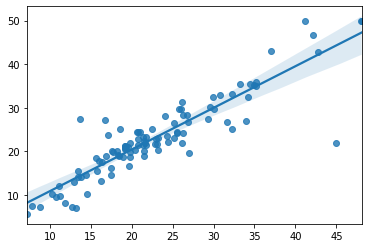

In [11]:
sns.regplot(y_pred[:, 0], y_test)

In [12]:
interpret_model = tf.keras.models.clone_model(model)
interpret_model.set_weights(model.get_weights())
interpret_model.layers[0].activation = softplus_activation(beta=10.0)
interpret_model.layers[1].activation = softplus_activation(beta=10.0)

In [13]:
explainer = PathExplainerTF(interpret_model)

In [14]:
attributions = explainer.attributions(inputs=x_test_scaled.astype(np.float32),
                                      baseline=x_train_scaled.astype(np.float32),
                                      batch_size=100,
                                      num_samples=200,
                                      use_expectation=True,
                                      output_indices=0,
                                      verbose=True)

100%|██████████| 102/102 [00:01<00:00, 90.38it/s]


In [15]:
interactions = explainer.interactions(inputs=x_test_scaled.astype(np.float32),
                                      baseline=x_train_scaled.astype(np.float32),
                                      batch_size=100,
                                      num_samples=200,
                                      use_expectation=True,
                                      output_indices=0,
                                      verbose=True)

  2%|▏         | 2/102 [00:03<03:03,  1.84s/it]

  3%|▎         | 3/102 [00:05<03:00,  1.82s/it]

  4%|▍         | 4/102 [00:07<02:59,  1.83s/it]

  5%|▍         | 5/102 [00:09<02:57,  1.83s/it]

  6%|▌         | 6/102 [00:10<02:55,  1.82s/it]

  7%|▋         | 7/102 [00:12<02:55,  1.85s/it]

  8%|▊         | 8/102 [00:14<02:53,  1.85s/it]

  9%|▉         | 9/102 [00:16<02:51,  1.85s/it]

 10%|▉         | 10/102 [00:18<02:49,  1.84s/it]

 11%|█         | 11/102 [00:20<02:46,  1.83s/it]

 12%|█▏        | 12/102 [00:22<02:47,  1.86s/it]

 13%|█▎        | 13/102 [00:23<02:45,  1.86s/it]

 14%|█▎        | 14/102 [00:25<02:43,  1.85s/it]

 15%|█▍        | 15/102 [00:27<02:40,  1.84s/it]

 16%|█▌        | 16/102 [00:29<02:37,  1.84s/it]

 17%|█▋        | 17/102 [00:31<02:39,  1.87s/it]

 18%|█▊        | 18/102 [00:33<02:35,  1.86s/it]

 19%|█▊        | 19/102 [00:35<02:34,  1.87s/it]

 20%|█▉        | 20/102 [00:36<02:32,  1.86s/it]

 21%|██        | 21/102 [00:38<02:33,  1.90s/it]

 22%|██▏       | 22/102 [00:40<02:30,  1.88s/it]

 23%|██▎       | 23/102 [00:42<02:28,  1.88s/it]

 24%|██▎       | 24/102 [00:44<02:25,  1.87s/it]

 25%|██▍       | 25/102 [00:46<02:24,  1.88s/it]

 25%|██▌       | 26/102 [00:48<02:23,  1.89s/it]

 26%|██▋       | 27/102 [00:50<02:21,  1.88s/it]

 27%|██▋       | 28/102 [00:52<02:17,  1.86s/it]

 28%|██▊       | 29/102 [00:53<02:15,  1.85s/it]

 29%|██▉       | 30/102 [00:55<02:14,  1.87s/it]

 30%|███       | 31/102 [00:57<02:15,  1.90s/it]

 31%|███▏      | 32/102 [00:59<02:11,  1.88s/it]

 32%|███▏      | 33/102 [01:01<02:08,  1.87s/it]

 33%|███▎      | 34/102 [01:03<02:06,  1.86s/it]

 34%|███▍      | 35/102 [01:05<02:03,  1.84s/it]

 35%|███▌      | 36/102 [01:07<02:04,  1.89s/it]

 36%|███▋      | 37/102 [01:08<02:01,  1.86s/it]

 37%|███▋      | 38/102 [01:10<01:57,  1.84s/it]

 38%|███▊      | 39/102 [01:12<01:55,  1.84s/it]

 39%|███▉      | 40/102 [01:14<01:53,  1.83s/it]

 40%|████      | 41/102 [01:16<01:54,  1.88s/it]

 41%|████      | 42/102 [01:18<01:52,  1.87s/it]

 42%|████▏     | 43/102 [01:19<01:49,  1.86s/it]

 43%|████▎     | 44/102 [01:21<01:46,  1.84s/it]

 44%|████▍     | 45/102 [01:23<01:44,  1.83s/it]

 45%|████▌     | 46/102 [01:25<01:44,  1.86s/it]

 46%|████▌     | 47/102 [01:27<01:41,  1.85s/it]

 47%|████▋     | 48/102 [01:29<01:39,  1.84s/it]

 48%|████▊     | 49/102 [01:30<01:37,  1.84s/it]

 49%|████▉     | 50/102 [01:32<01:37,  1.88s/it]

 50%|█████     | 51/102 [01:34<01:34,  1.86s/it]

 51%|█████     | 52/102 [01:36<01:32,  1.84s/it]

 52%|█████▏    | 53/102 [01:38<01:31,  1.86s/it]

 53%|█████▎    | 54/102 [01:40<01:31,  1.90s/it]

 54%|█████▍    | 55/102 [01:42<01:28,  1.87s/it]

 55%|█████▍    | 56/102 [01:44<01:25,  1.85s/it]

 56%|█████▌    | 57/102 [01:45<01:23,  1.85s/it]

 57%|█████▋    | 58/102 [01:47<01:20,  1.84s/it]

 58%|█████▊    | 59/102 [01:49<01:18,  1.83s/it]

 59%|█████▉    | 60/102 [01:51<01:18,  1.86s/it]

 60%|█████▉    | 61/102 [01:53<01:15,  1.85s/it]

 61%|██████    | 62/102 [01:55<01:13,  1.85s/it]

 62%|██████▏   | 63/102 [01:57<01:12,  1.85s/it]

 63%|██████▎   | 64/102 [01:58<01:10,  1.85s/it]

 64%|██████▎   | 65/102 [02:00<01:07,  1.83s/it]

 65%|██████▍   | 66/102 [02:02<01:06,  1.86s/it]

 66%|██████▌   | 67/102 [02:04<01:04,  1.83s/it]

 67%|██████▋   | 68/102 [02:06<01:02,  1.83s/it]

 68%|██████▊   | 69/102 [02:07<00:59,  1.82s/it]

 69%|██████▊   | 70/102 [02:09<00:58,  1.83s/it]

 70%|██████▉   | 71/102 [02:11<00:57,  1.85s/it]

 71%|███████   | 72/102 [02:13<00:54,  1.83s/it]

 72%|███████▏  | 73/102 [02:15<00:52,  1.81s/it]

 73%|███████▎  | 74/102 [02:17<00:50,  1.81s/it]

 74%|███████▎  | 75/102 [02:18<00:49,  1.84s/it]

 75%|███████▍  | 76/102 [02:20<00:47,  1.83s/it]

 75%|███████▌  | 77/102 [02:22<00:45,  1.81s/it]

 76%|███████▋  | 78/102 [02:24<00:43,  1.81s/it]

 77%|███████▋  | 79/102 [02:26<00:41,  1.81s/it]

 78%|███████▊  | 80/102 [02:28<00:40,  1.84s/it]

 79%|███████▉  | 81/102 [02:29<00:38,  1.82s/it]

 80%|████████  | 82/102 [02:31<00:36,  1.82s/it]

 81%|████████▏ | 83/102 [02:33<00:34,  1.80s/it]

 82%|████████▏ | 84/102 [02:35<00:33,  1.86s/it]

 83%|████████▎ | 85/102 [02:37<00:31,  1.84s/it]

 84%|████████▍ | 86/102 [02:39<00:29,  1.83s/it]

 85%|████████▌ | 87/102 [02:40<00:27,  1.82s/it]

 86%|████████▋ | 88/102 [02:42<00:25,  1.82s/it]

 87%|████████▋ | 89/102 [02:44<00:23,  1.83s/it]

 88%|████████▊ | 90/102 [02:46<00:22,  1.86s/it]

 89%|████████▉ | 91/102 [02:48<00:20,  1.85s/it]

 90%|█████████ | 92/102 [02:50<00:18,  1.83s/it]

 91%|█████████ | 93/102 [02:51<00:16,  1.82s/it]

 92%|█████████▏| 94/102 [02:53<00:14,  1.81s/it]

 93%|█████████▎| 95/102 [02:55<00:12,  1.83s/it]

 94%|█████████▍| 96/102 [02:57<00:11,  1.85s/it]

 95%|█████████▌| 97/102 [02:59<00:09,  1.84s/it]

 96%|█████████▌| 98/102 [03:00<00:07,  1.83s/it]

 97%|█████████▋| 99/102 [03:02<00:05,  1.81s/it]

 98%|█████████▊| 100/102 [03:04<00:03,  1.84s/it]

 99%|█████████▉| 101/102 [03:06<00:01,  1.83s/it]

100%|██████████| 102/102 [03:08<00:00,  1.85s/it]


In [16]:
# Taken from https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

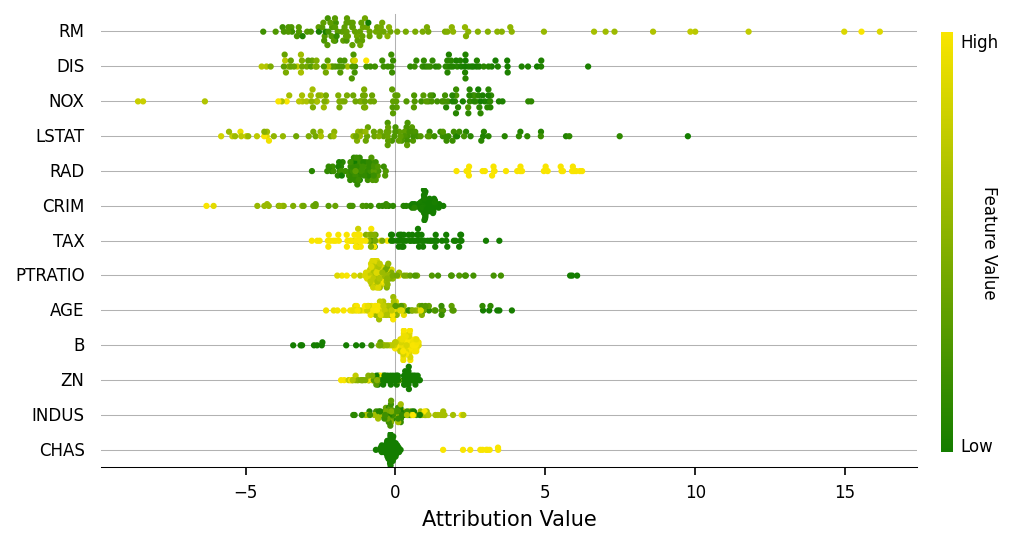

In [21]:
summary_plot(attributions,
             x_test,
             feature_names=feature_names,
             plot_top_k=13)


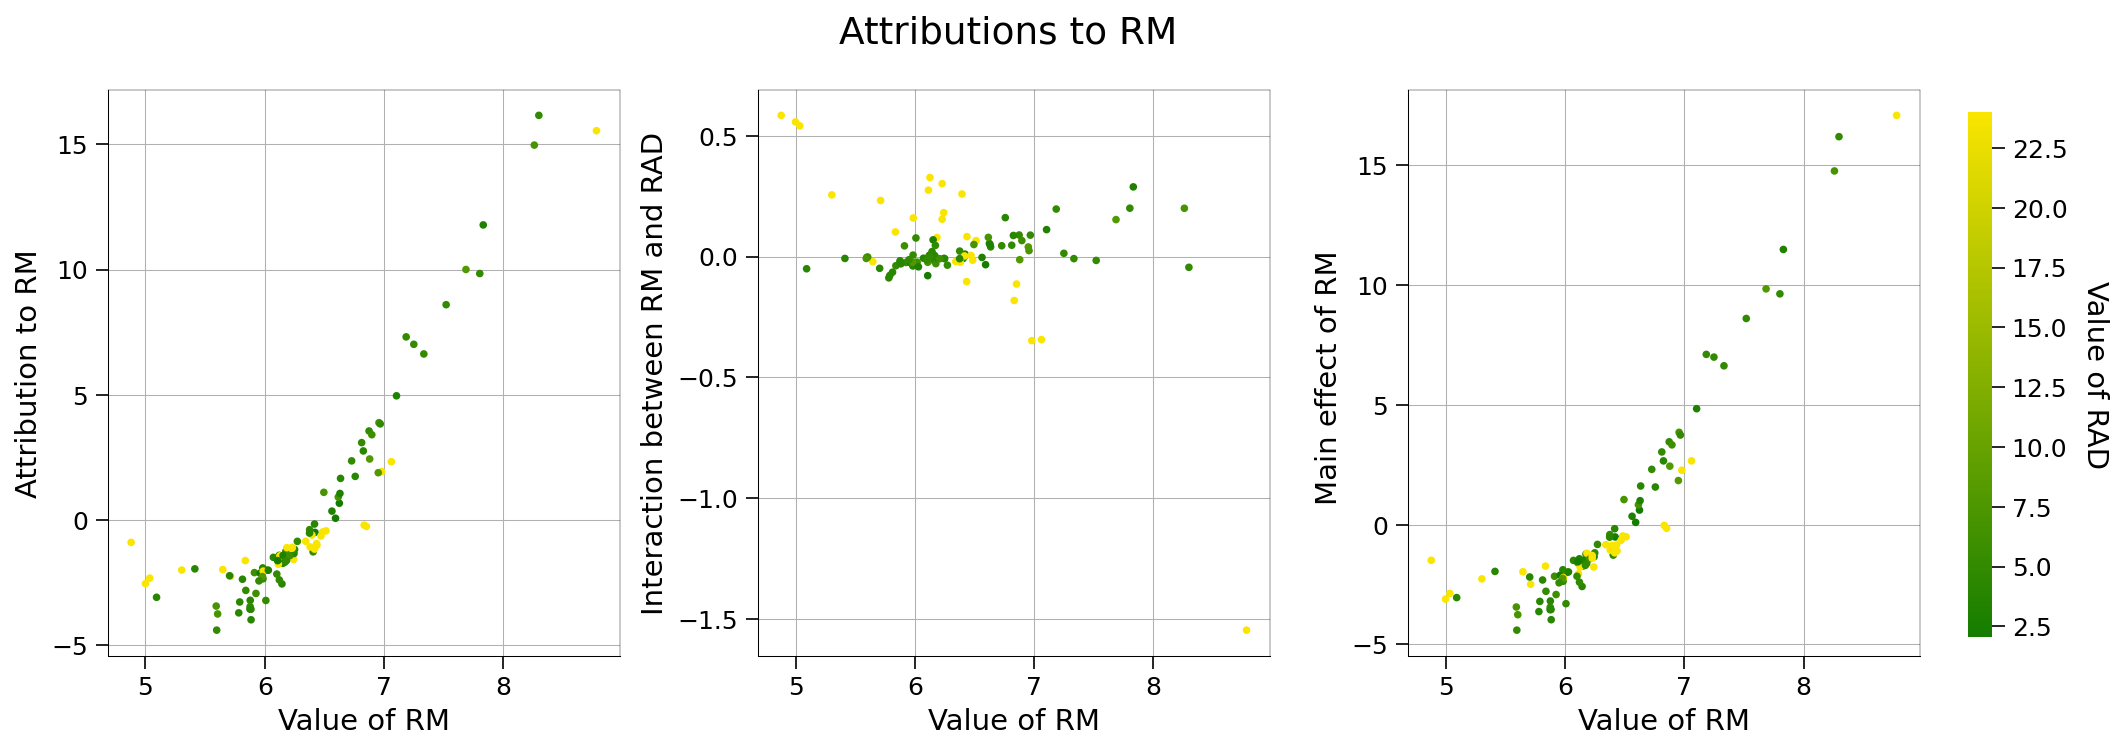

In [22]:
fig, axs = scatter_plot(attributions,
                        x_test,
                        feature_index='RM',
                        interactions=interactions,
                        color_by='RAD',
                        feature_names=feature_names,
                        scale_y_ind=True)

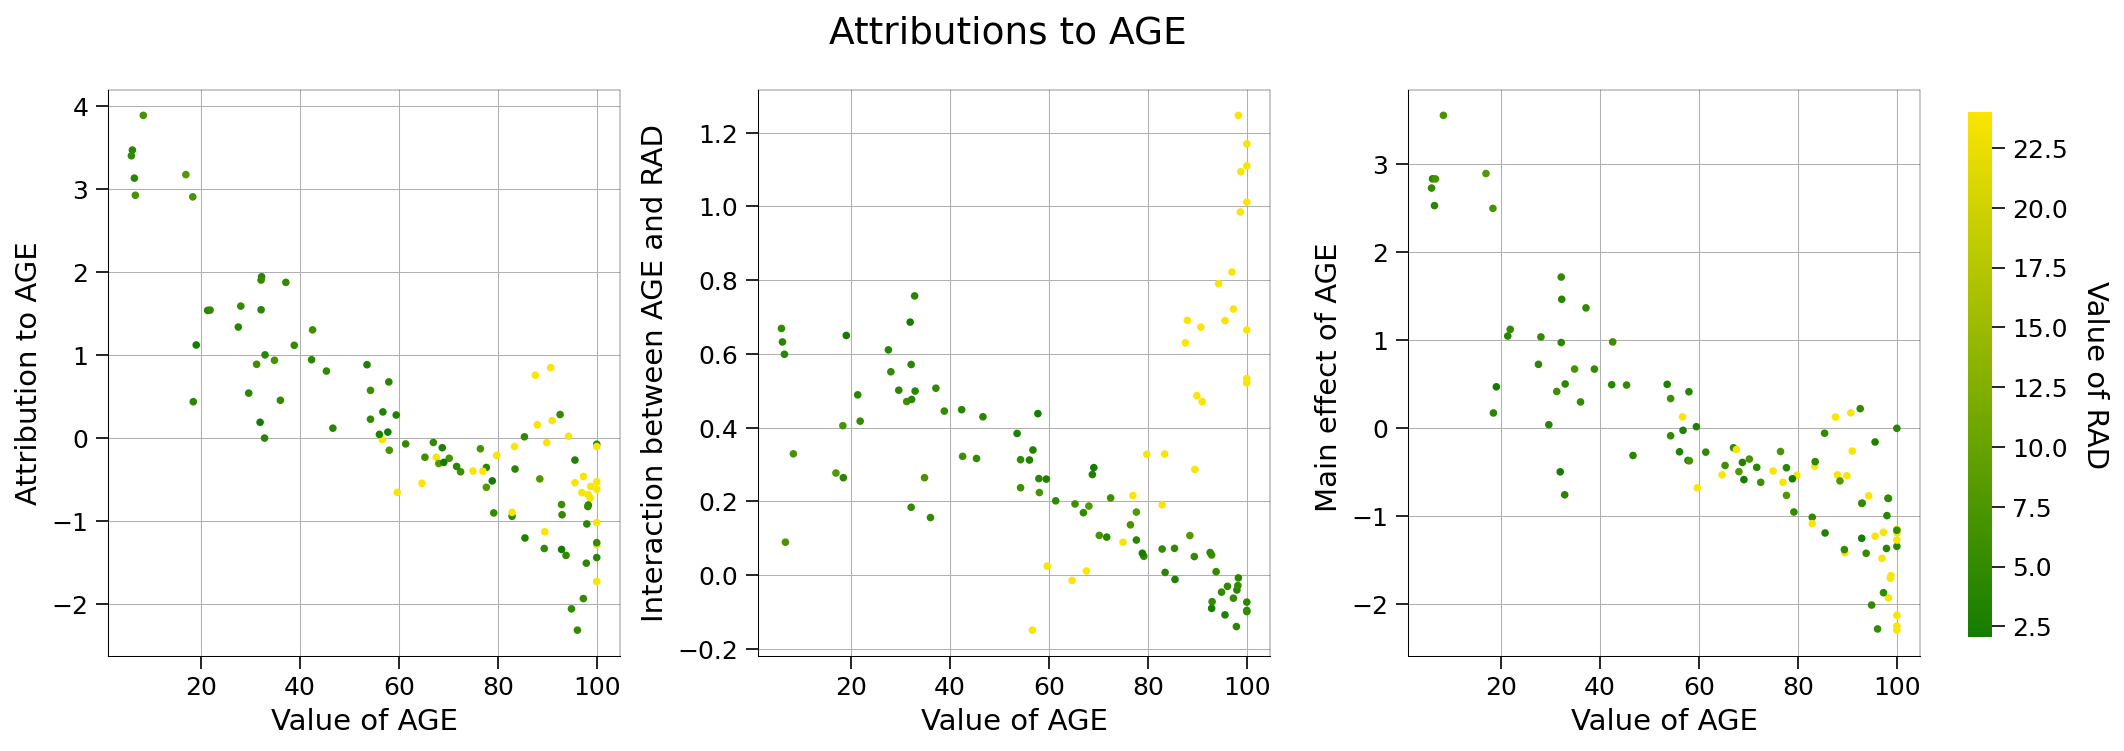

In [42]:
fig, axs = scatter_plot(attributions,
                        x_test,
                        feature_index='AGE',
                        interactions=interactions,
                        color_by='RAD',
                        feature_names=feature_names,
                        scale_y_ind=True)

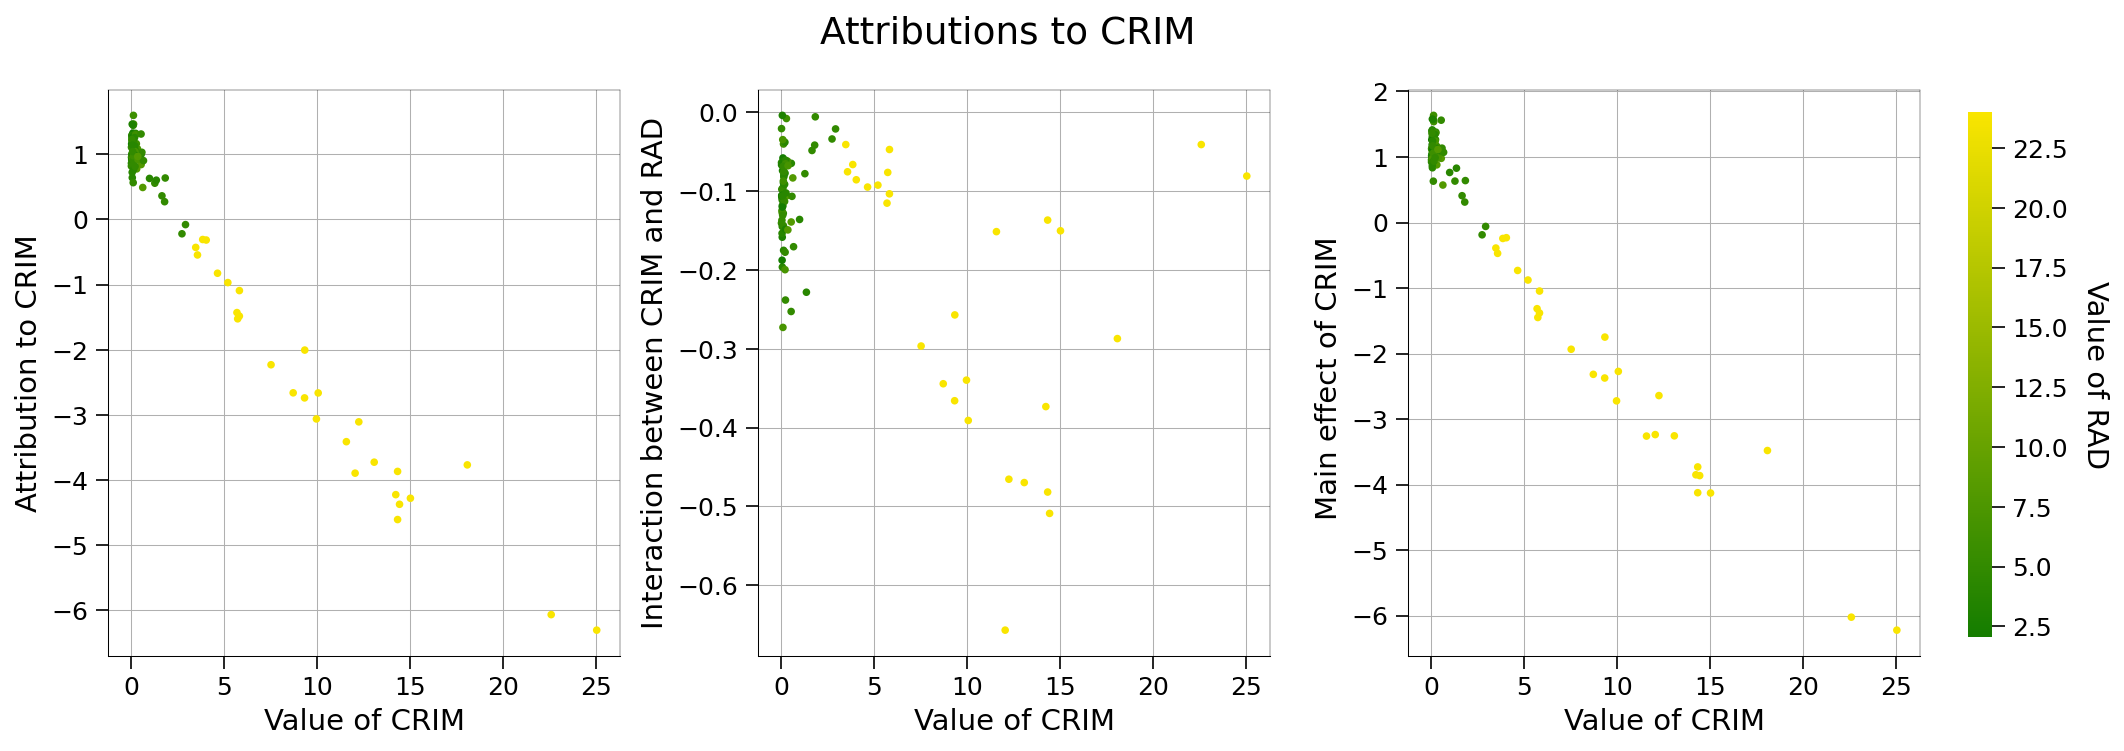

In [23]:
fig, axs = scatter_plot(attributions,
                        x_test,
                        feature_index='CRIM',
                        interactions=interactions,
                        color_by='RAD',
                        feature_names=feature_names,
                        scale_y_ind=True)

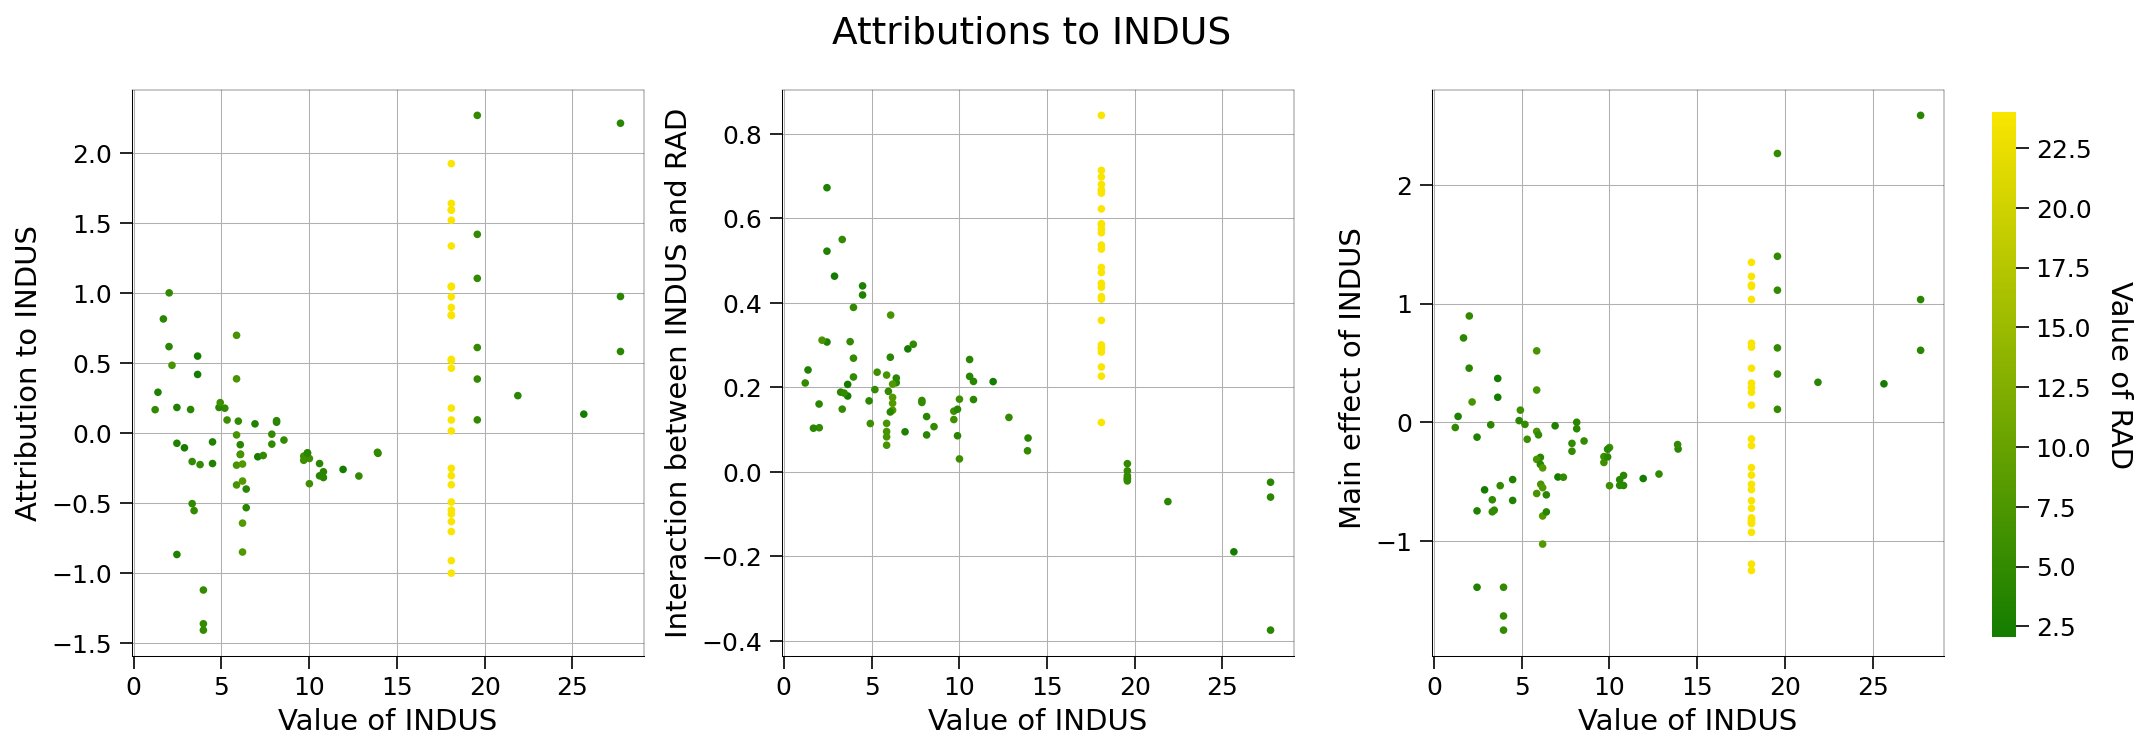

In [43]:
fig, axs = scatter_plot(attributions,
                        x_test,
                        feature_index='INDUS',
                        interactions=interactions,
                        color_by='RAD',
                        feature_names=feature_names,
                        scale_y_ind=True)

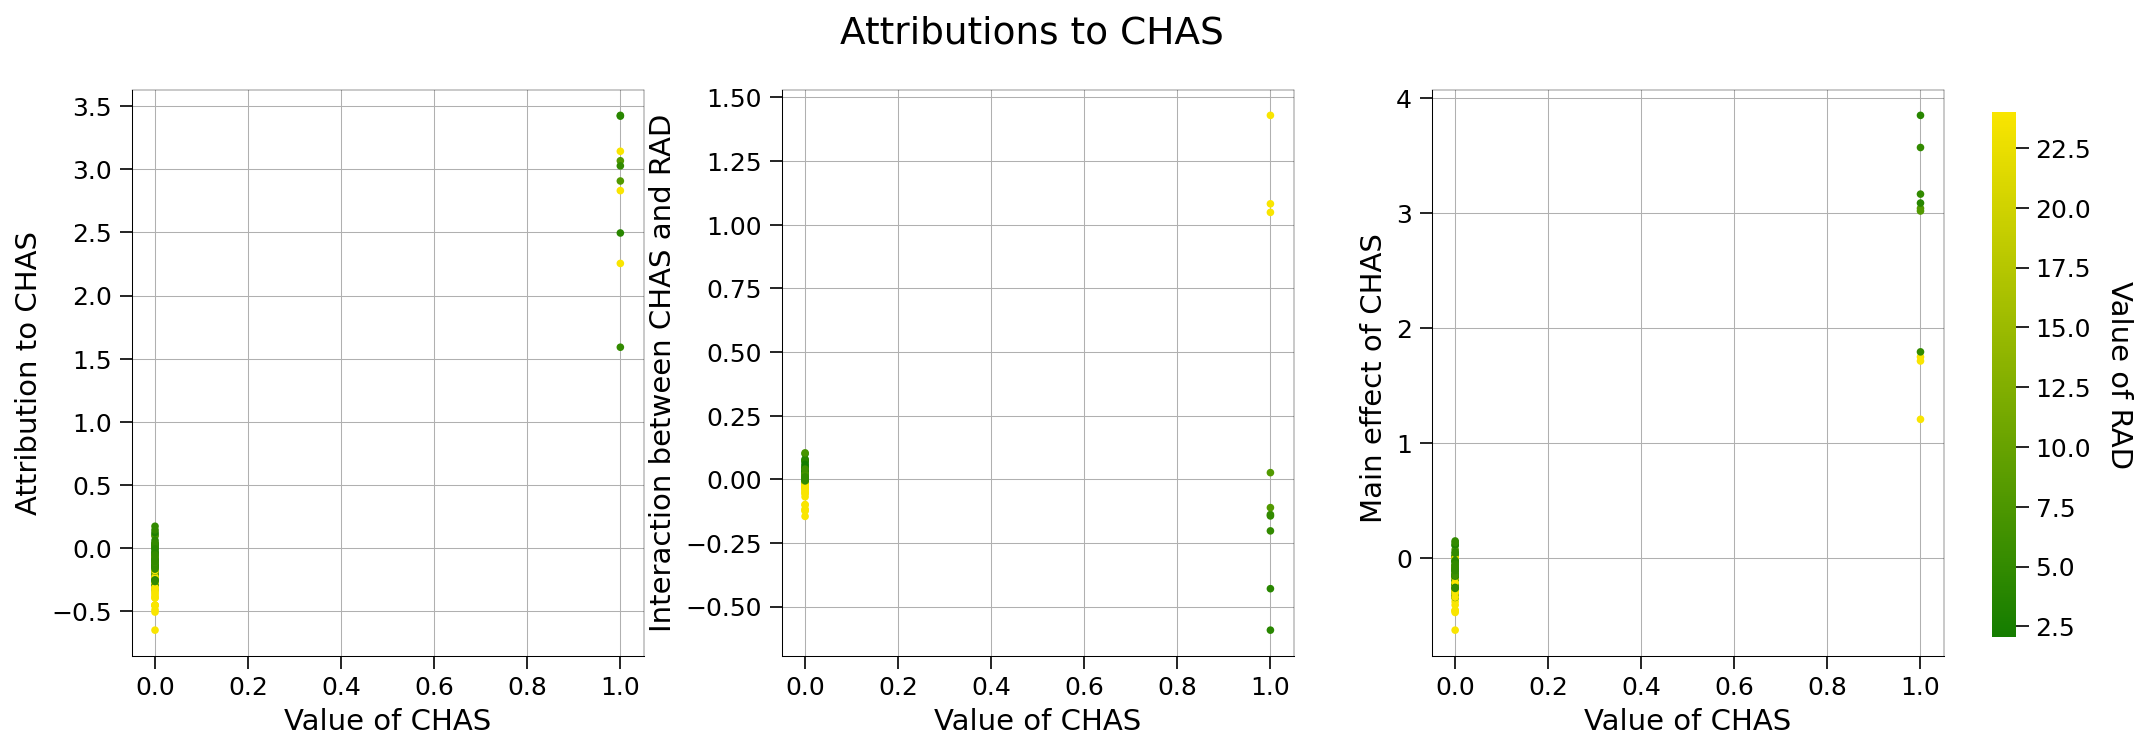

In [44]:
fig, axs = scatter_plot(attributions,
                        x_test,
                        feature_index='CHAS',
                        interactions=interactions,
                        color_by='RAD',
                        feature_names=feature_names,
                        scale_y_ind=True)

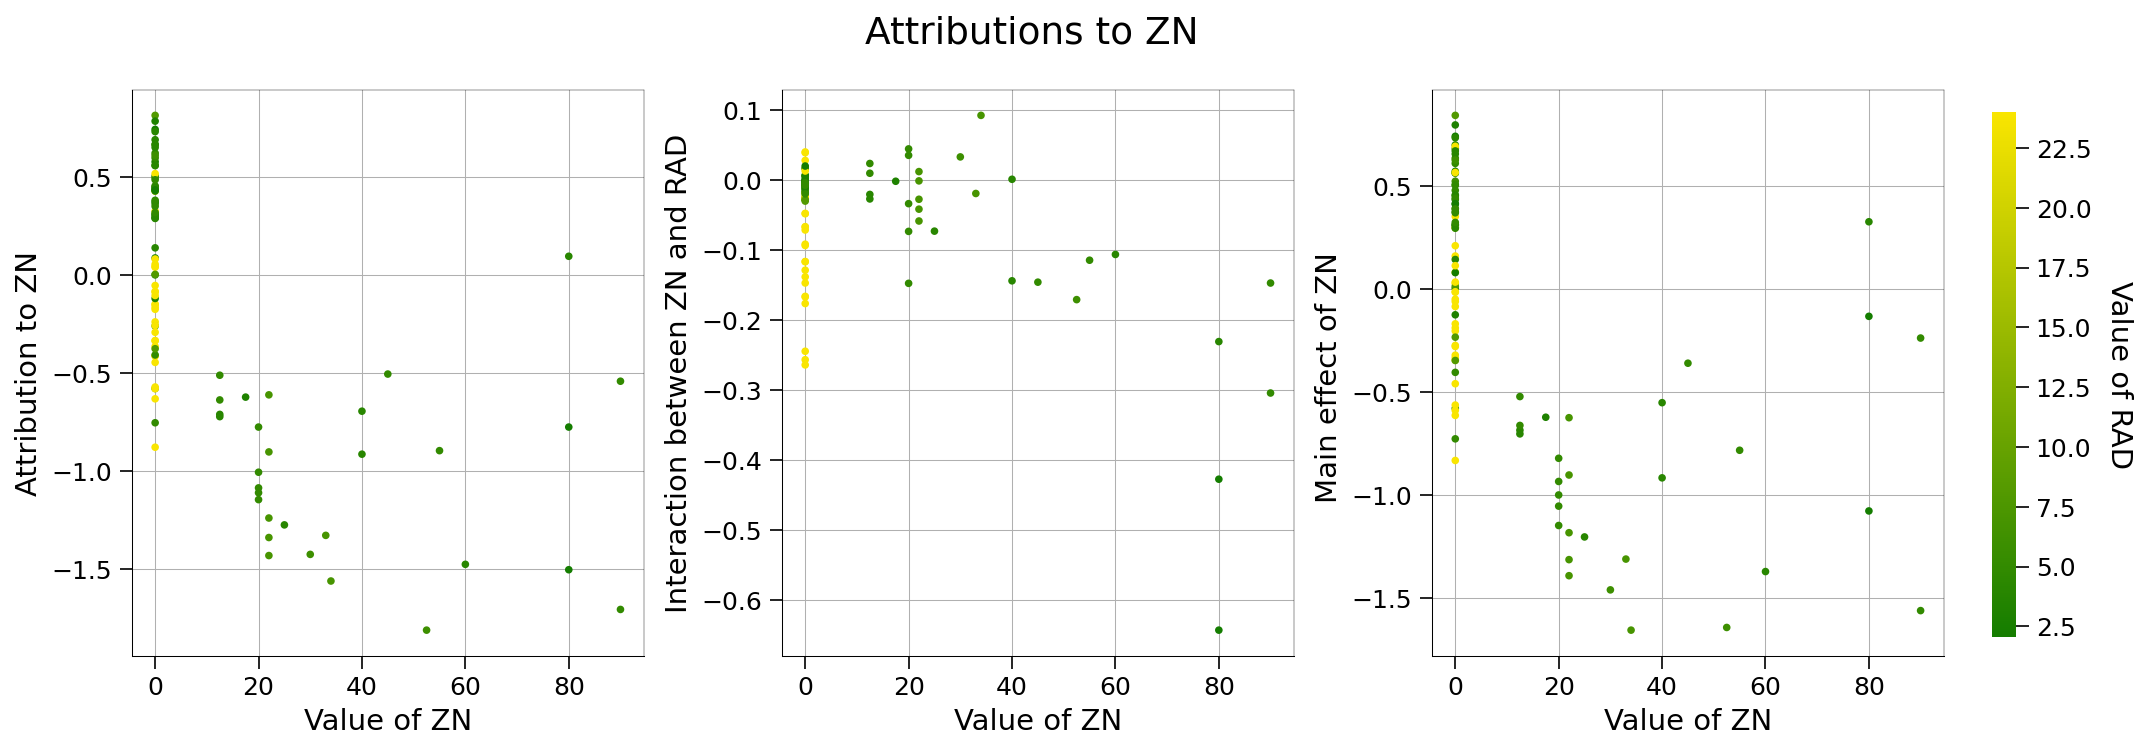

In [45]:
fig, axs = scatter_plot(attributions,
                        x_test,
                        feature_index='ZN',
                        interactions=interactions,
                        color_by='RAD',
                        feature_names=feature_names,
                        scale_y_ind=True)

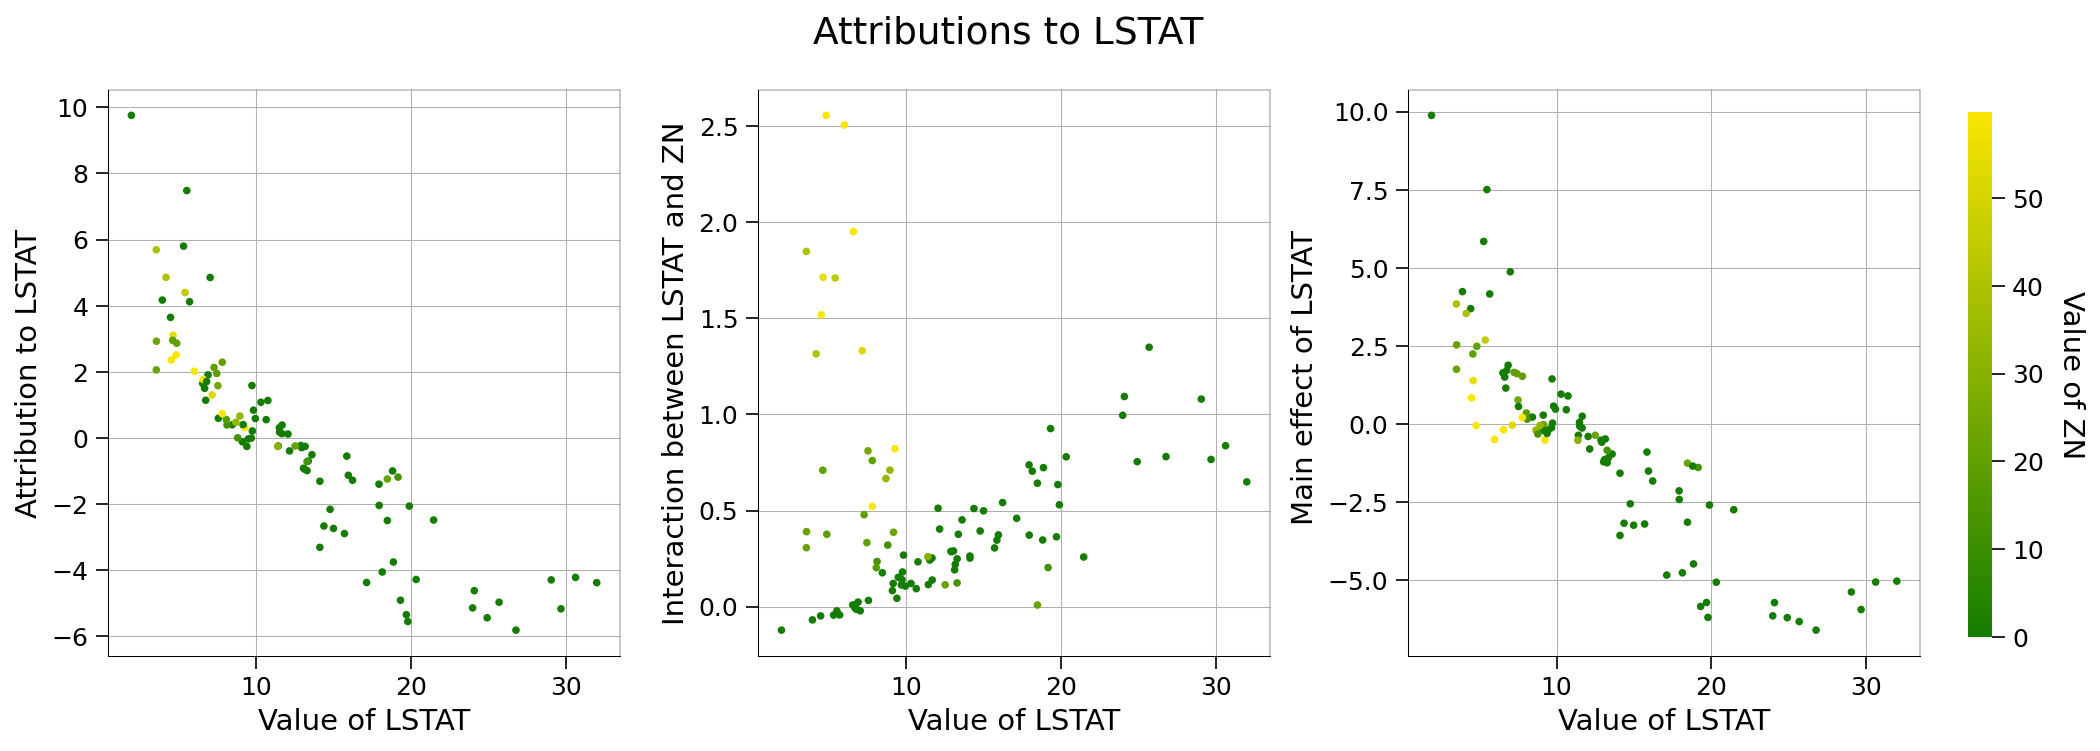

In [51]:
fig, axs = scatter_plot(attributions,
                        x_test,
                        feature_index='LSTAT',
                        interactions=interactions,
                        color_by='ZN',
                        feature_names=feature_names,
                        scale_y_ind=True)

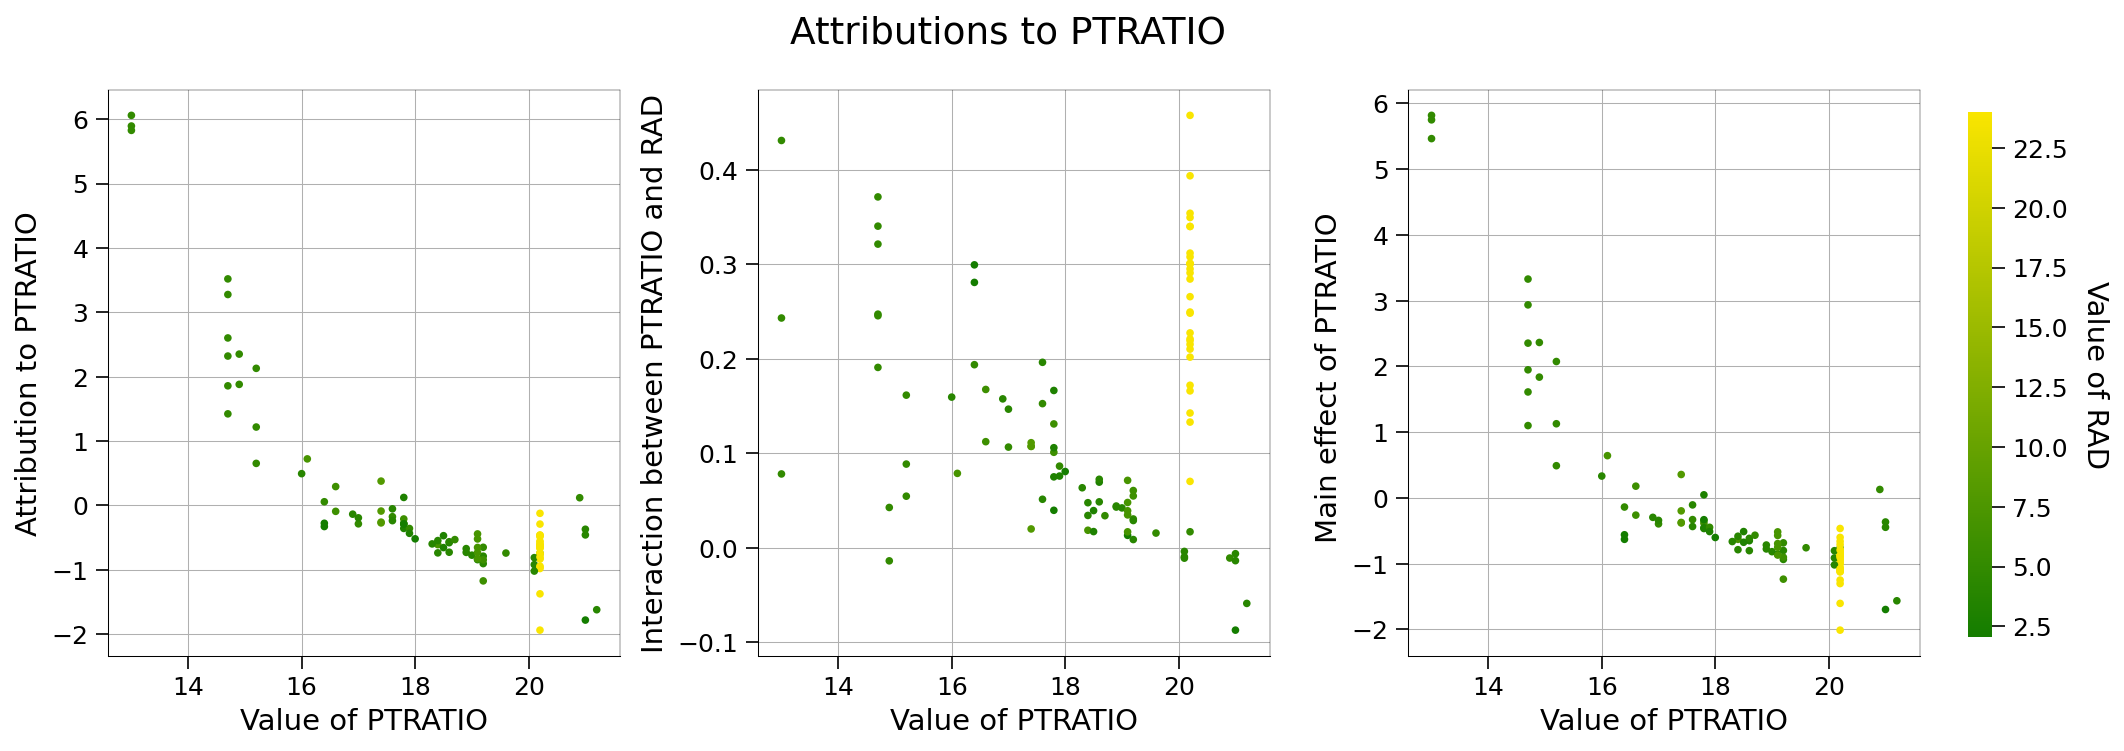

In [46]:
fig, axs = scatter_plot(attributions,
                        x_test,
                        feature_index='PTRATIO',
                        interactions=interactions,
                        color_by='RAD',
                        feature_names=feature_names,
                        scale_y_ind=True)

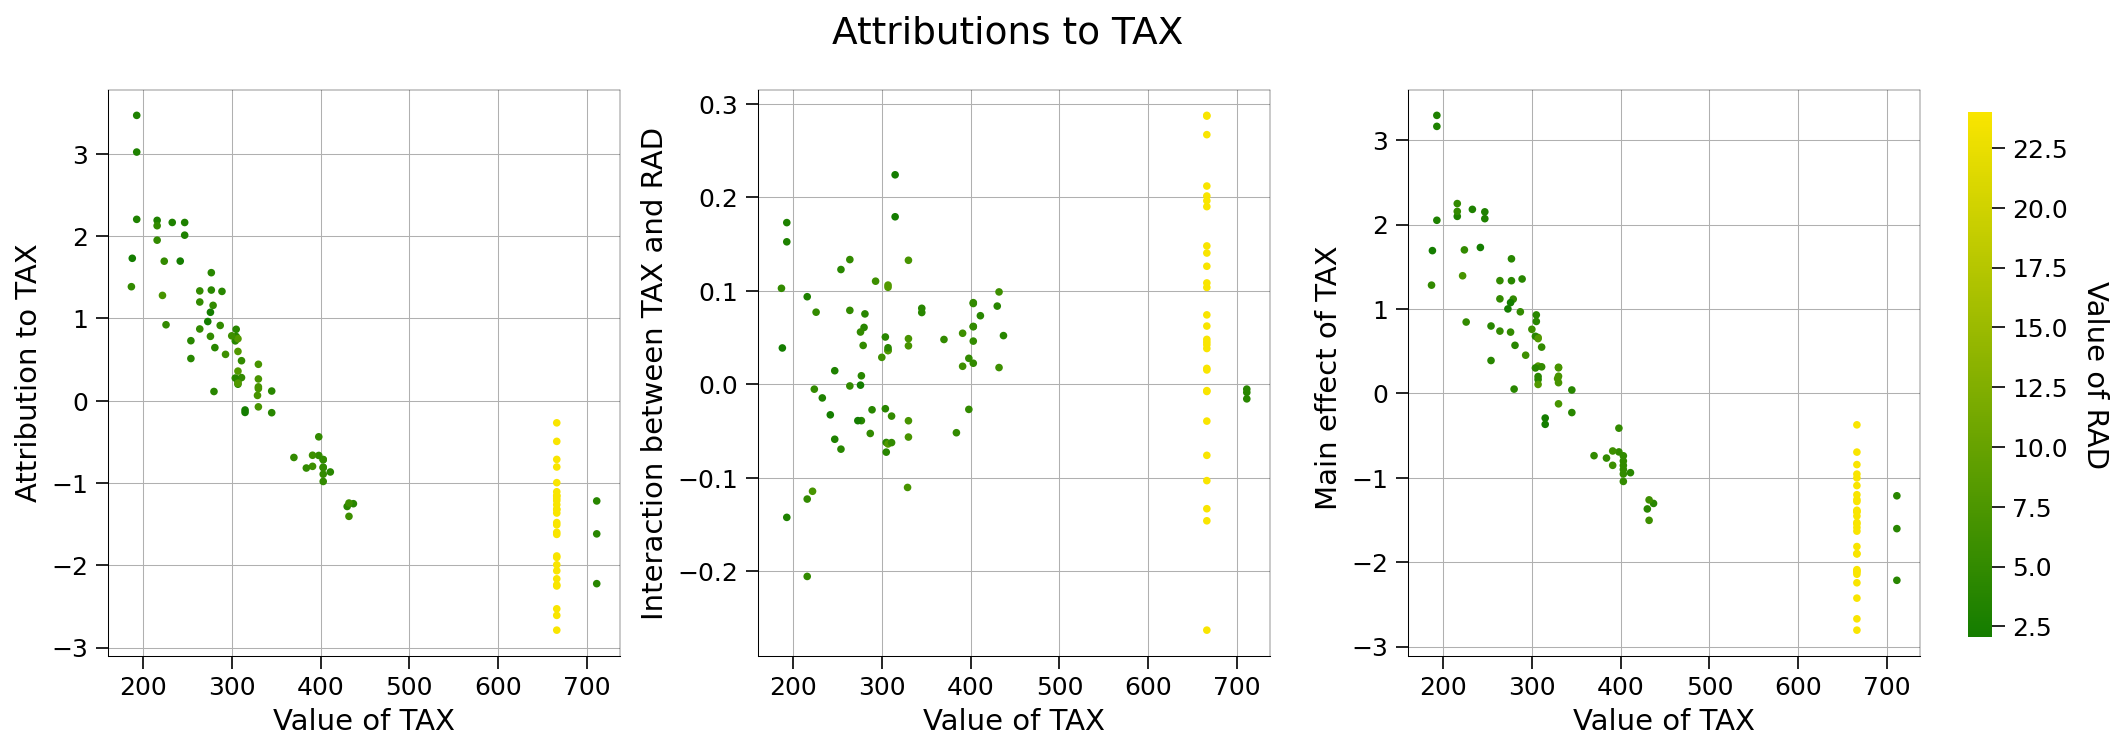

In [47]:
fig, axs = scatter_plot(attributions,
                        x_test,
                        feature_index='TAX',
                        interactions=interactions,
                        color_by='RAD',
                        feature_names=feature_names,
                        scale_y_ind=True)

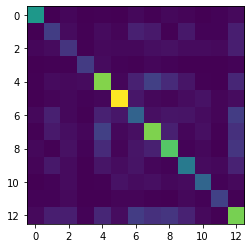

In [48]:
plt.imshow(mean_abs_interactions)

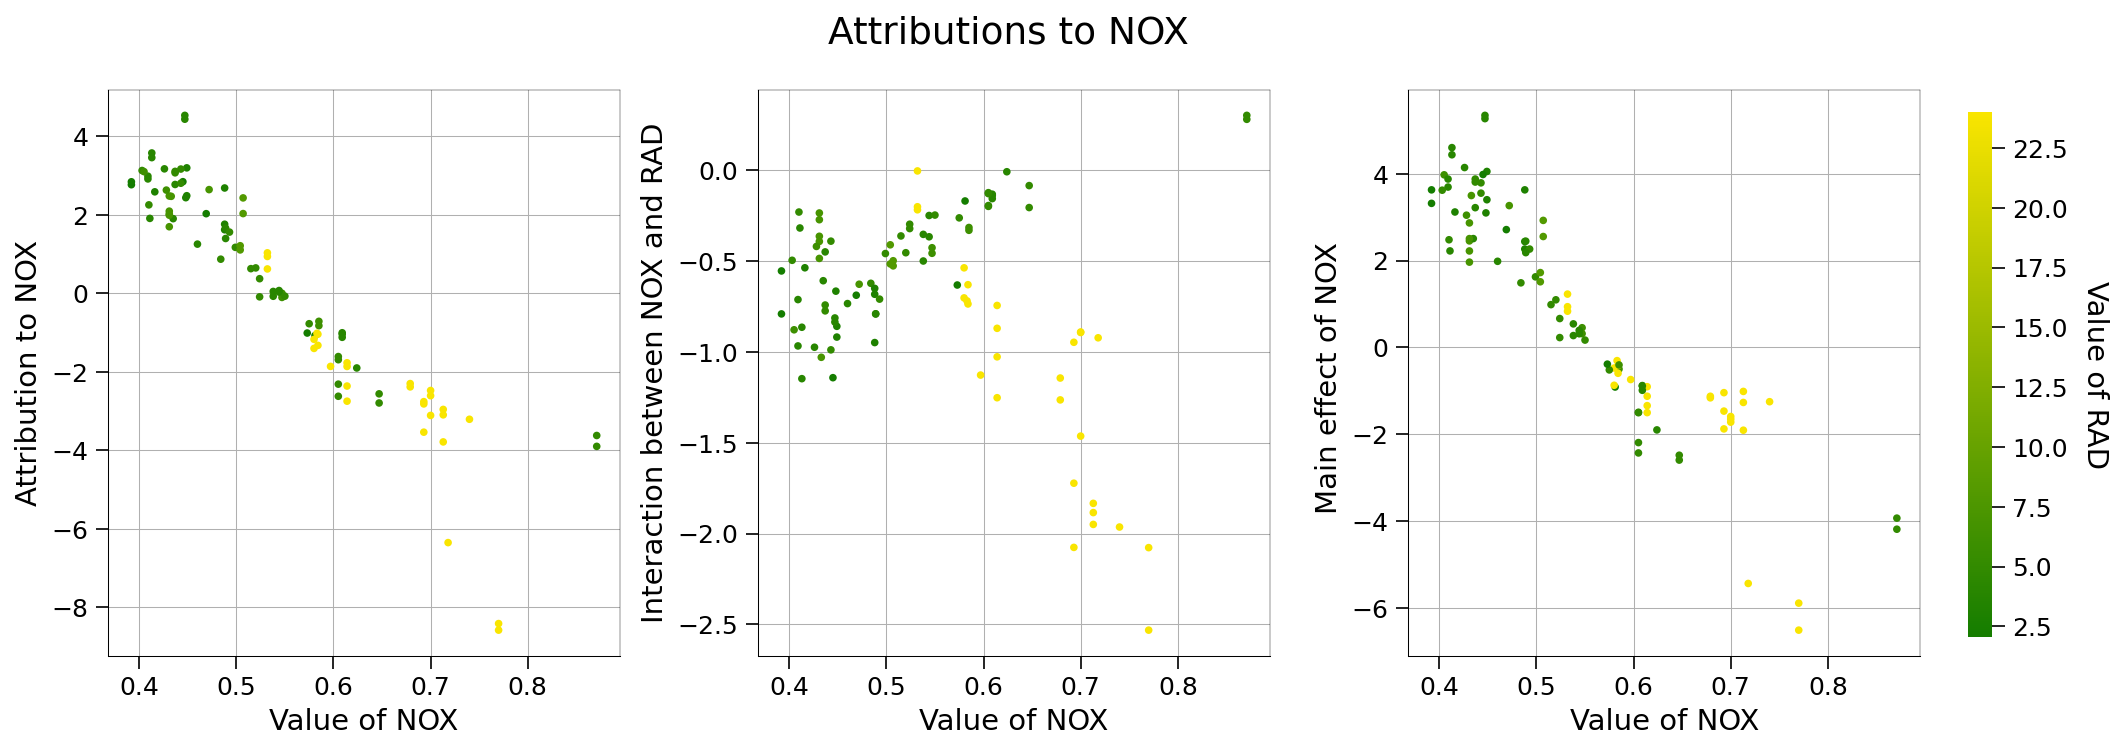

In [24]:
fig, axs = scatter_plot(attributions,
                        x_test,
                        feature_index='NOX',
                        interactions=interactions,
                        color_by='RAD',
                        feature_names=feature_names,
                        scale_y_ind=True)

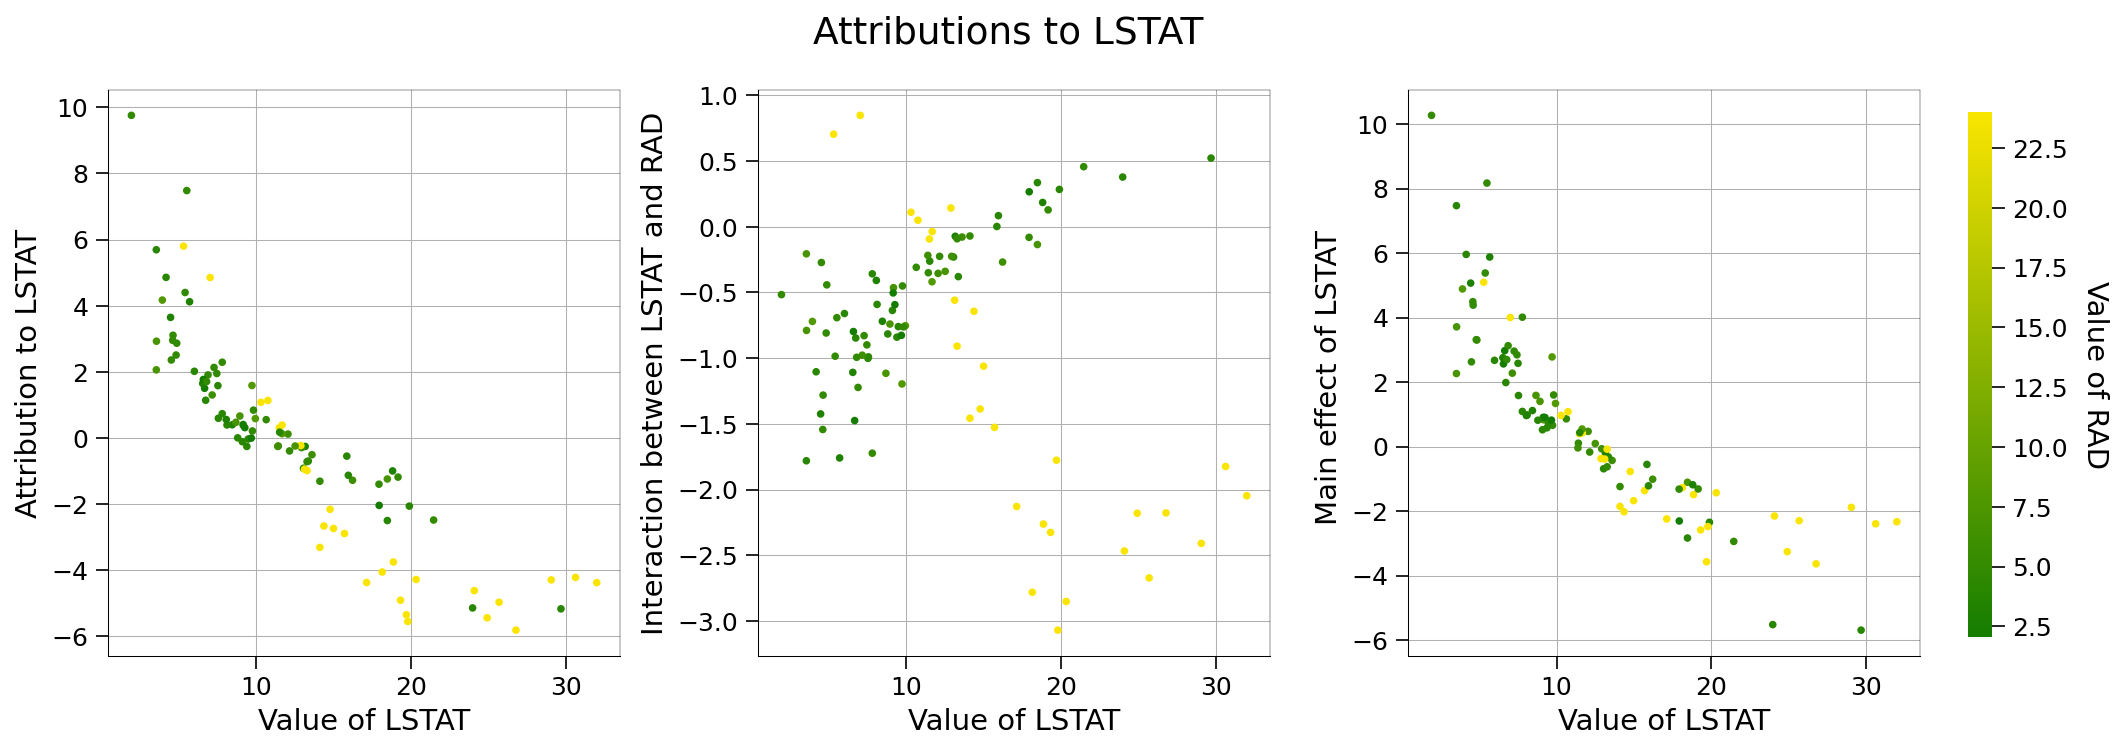

In [25]:
fig, axs = scatter_plot(attributions,
                        x_test,
                        feature_index='LSTAT',
                        interactions=interactions,
                        color_by='RAD',
                        feature_names=feature_names,
                        scale_y_ind=True)